In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt

In [2]:
def plot_result(result,start_from=1,period=17,insert_index=6,time_start=-7,file_name="result",title="Event Study Coefficients with Confidence Intervals"):
    summary_table=pd.DataFrame(result.summary.tables[1].data[start_from:start_from+period],columns=result.summary.tables[1].data[0])
    new_row=[0]*len(summary_table.columns)
    # insert_index = 4
    summary_table = pd.concat([summary_table.iloc[:insert_index], pd.DataFrame([new_row],columns=summary_table.columns), summary_table.iloc[insert_index:]]).reset_index(drop=True)

    summary_table["Time"]=np.array(list(range(time_start,period+time_start+1)))
    # make each column of summary_table numeric
    summary_table=summary_table.apply(pd.to_numeric, errors='ignore')
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plot coefficients as points
    plt.plot(summary_table['Time'], summary_table["Parameter"], 'o-', label='Coefficients', color='b')

    # Plot confidence intervals as error bars
    # plt.errorbar(summary_table['Time'], summary_table["Parameter"],
    #              yerr=[summary_table["Parameter"] - summary_table['Lower CI'],
    #                    summary_table['Upper CI'] - summary_table["Parameter"]],
    #              fmt='none', ecolor='orange', elinewidth=2, capsize=4, label='Confidence Intervals')

    plt.fill_between(summary_table['Time'], summary_table['Lower CI'], summary_table['Upper CI'], color='orange', alpha=0.3, label='Confidence Intervals')

    plt.xlabel('Time')
    # Set y-axis properties
    plt.ylim(-1, 1)  # Set the y-axis limits
    plt.ylabel("Parameter")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("./plots/{}.png".format(file_name),dpi=300,bbox_inches="tight",transparent=False,facecolor="white")
    plt.show()
    # return summary_table

In [3]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_in_oral_DropNever.csv",encoding="shift-jis",index_col=0)

In [4]:
df["year_trend"]=df["year"]-2014
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
elasped_m7          0.3304     0.3072     1.0755     0.2823     -0.2721      0.9329
elasped_m6         -0.0603     0.1147    -0.5254     0.5993     -0.2852      0.1647
elasped_m5          0.2136     0.1764     1.2110     0.2261     -0.1324      0.5595
elasped_m4          0.0703     0.1435     0.4900     0.6242     -0.2112      0.3518
elasped_m3          0.2104     0.1369     1.5370     0.1245     -0.0581      0.4789
elasped_m2          0.1230     0.1469     0.8378     0.4023     -0.1650      0.4111
elasped_m1          0.2848     0.1709     1.6664     0.0958     -0.0504      0.6200
elasped_0           0.0197     0.1454     0.1352     0.8924     -0.2655      0.3048
elasped_1           0.2935     0.1343     2.1844     0.0291      0.0299     

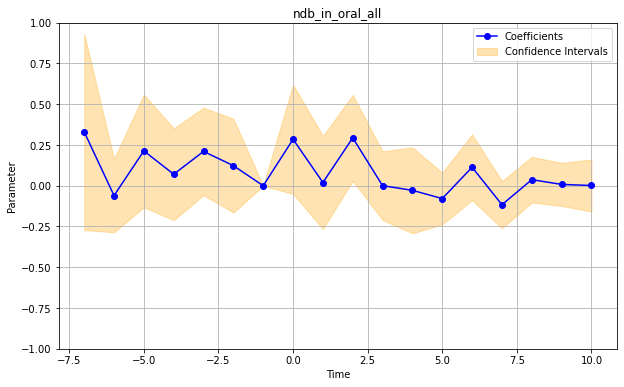

In [5]:
# all data
# period: 15
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# period:20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"
mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all",period=15)
plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all")

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3518
Estimator:                   PanelOLS   R-squared (Between):             -0.0992
No. Observations:                 747   R-squared (Within):              -2.5174
Date:                Wed, Sep 06 2023   R-squared (Overall):             -0.5996
Time:                        21:00:18   Log-likelihood                   -1102.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.680
Entities:                          42   P-value                           0.0000
Avg Obs:                       17.786   Distribution:                  F(22,676)
Min Obs:                       6.0000                                           
Max Obs:                       32.000   F-statistic (robust):          5.668e+06
                            

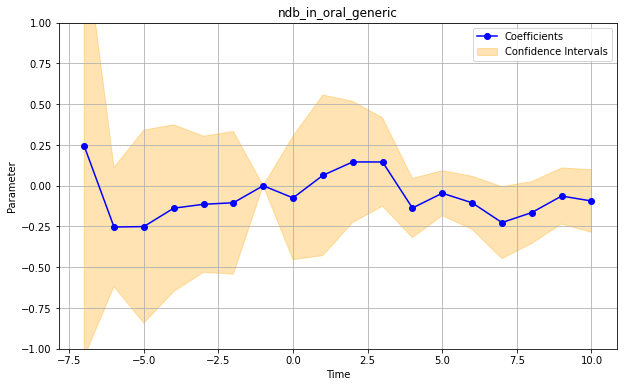

In [6]:
# generic data
formula="log_quantity~elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+oral+in_hospital+TimeEffects+EntityEffects"

# period:20
# formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"
mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic")

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.4048
Estimator:                   PanelOLS   R-squared (Between):             -0.2507
No. Observations:                 937   R-squared (Within):              -1.4178
Date:                Wed, Sep 06 2023   R-squared (Overall):             -0.7000
Time:                        21:00:19   Log-likelihood                   -1630.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      26.737
Entities:                          43   P-value                           0.0000
Avg Obs:                       21.791   Distribution:                  F(22,865)
Min Obs:                       14.000                                           
Max Obs:                       32.000   F-statistic (robust):          3.588e+08
                            

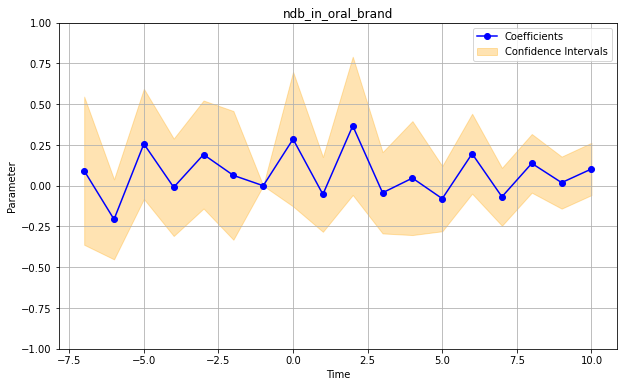

In [7]:
# branded data
formula="log_quantity~ oral+in_hospital+elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# period:20
# formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"

# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_brand",title="ndb_in_oral_brand",start_from=3)